                                        ENVIRONMENT  SETUP

In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
import pickle

                                        DATA ACQUISITION

In [3]:
# LOAD THE EnvironmentalData DATASET
df0=pd.read_csv(r"C:\Users\DELL\Downloads\14183327\EnvironmentalData.csv")

In [4]:
# VIEW THE DATASET
df0.head()

,cruise,lat,lon,date,salinity,temp,par,SiO4,NO3_NO2,PO4,MLD,light
0,TN271,47.0,-127.7,2011-10-26T17:00:00Z,NaN,14.742111,1020.094444,NaN,NaN,NaN,NaN,991.952516
1,TN271,46.3,-128.9,2011-10-26T22:00:00Z,32.582482,14.467120,992.973494,NaN,NaN,NaN,NaN,991.952516
2,TN271,46.2,-129.2,2011-10-26T23:00:00Z,32.590273,14.378584,962.789610,NaN,NaN,NaN,NaN,991.952516
3,TN271,46.0,-129.4,2011-10-27T00:00:00Z,32.604855,14.393727,1025.041818,NaN,NaN,NaN,NaN,549.695401
4,TN271,44.5,-130.8,2011-10-27T10:00:00Z,32.681104,15.207636,1023.990909,NaN,NaN,NaN,NaN,549.695401


In [5]:
#VIEW THE DATASET
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102 entries, 0 to 4101
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cruise    4102 non-null   object 
 1   lat       4079 non-null   float64
 2   lon       4079 non-null   float64
 3   date      4102 non-null   object 
 4   salinity  3671 non-null   float64
 5   temp      4025 non-null   float64
 6   par       3971 non-null   float64
 7   SiO4      386 non-null    float64
 8   NO3_NO2   426 non-null    float64
 9   PO4       436 non-null    float64
 10  MLD       1349 non-null   float64
 11  light     3332 non-null   float64
dtypes: float64(10), object(2)
memory usage: 384.7+ KB


In [6]:
# CHECK FOR MISSING VALUES
df0.isna().sum()

cruise         0
lat           23
lon           23
date           0
salinity     431
temp          77
par          131
SiO4        3716
NO3_NO2     3676
PO4         3666
MLD         2753
light        770
dtype: int64

In [7]:
# LOAD THE PSD_TransitionZone DATASET
df1=pd.read_csv(r"C:\Users\DELL\Downloads\14183327\PSD_TransitionZone.csv")

In [8]:
# VIEW THE DATASET
df1.head()

,cruise,date,pop,lat,lon,n_per_uL,c_per_uL,qc,diam
0,Thompson_9,2011-10-26T17:00:00Z,Synechococcus,47.954235,-125.96419,0.532951,0.048282,0.090593,0.82328
1,Thompson_9,2011-10-26T17:00:00Z,picoeukaryotes (< 2µm),47.954235,-125.96419,0.499954,0.042416,0.084840,0.80261
2,Thompson_9,2011-10-26T22:00:00Z,Prochlorococcus,NaN,NaN,28.921022,1.229286,0.042505,0.61399
3,Thompson_9,2011-10-26T22:00:00Z,Synechococcus,NaN,NaN,1.540266,0.165853,0.107678,0.88030
4,Thompson_9,2011-10-26T22:00:00Z,nanoeukaryotes (2-5µm),NaN,NaN,0.101352,0.139156,1.373000,2.36122


In [9]:
df1=df1.rename(columns={'qc':'carbon_quotas','diam':'Diameter','c_per_uL':'Biomass','n_per_uL':'Abundance'})

In [10]:
# VIEW THE DATASET
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15466 entries, 0 to 15465
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cruise         15466 non-null  object 
 1   date           15466 non-null  object 
 2   pop            15466 non-null  object 
 3   lat            14861 non-null  float64
 4   lon            14861 non-null  float64
 5   Abundance      15466 non-null  float64
 6   Biomass        15466 non-null  float64
 7   carbon_quotas  15466 non-null  float64
 8   Diameter       15466 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [11]:
# CHECK FOR MISSING VALUES
df1.isna().sum()

cruise             0
date               0
pop                0
lat              605
lon              605
Abundance          0
Biomass            0
carbon_quotas      0
Diameter           0
dtype: int64

In [12]:
# converts the 'date' column from its current format(object) into a proper datetime format.
df1['date'] = pd.to_datetime(df1['date'])

In [13]:
# Missing Data Imputation via Interpolation.
df1['lat'] =df1['lat'].interpolate()
df1['lon'] = df1['lon'].interpolate()

In [14]:
# CHECK FOR MISSING VALUES
df1.isna().sum()

cruise           0
date             0
pop              0
lat              0
lon              0
Abundance        0
Biomass          0
carbon_quotas    0
Diameter         0
dtype: int64

In [15]:
#MERGING THE DATASETS
df0['date'] = pd.to_datetime(df0['date'])
data = pd.merge(df0.drop(columns=['cruise','lat','lon']),df1.drop(columns=['cruise']), on='date', how='inner')
data.head(3)

,date,salinity,temp,par,SiO4,NO3_NO2,PO4,MLD,light,pop,lat,lon,Abundance,Biomass,carbon_quotas,Diameter
0,2011-10-26 17:00:00+00:00,NaN,14.742111,1020.094444,NaN,NaN,NaN,NaN,991.952516,Synechococcus,47.954235,-125.964190,0.532951,0.048282,0.090593,0.82328
1,2011-10-26 17:00:00+00:00,NaN,14.742111,1020.094444,NaN,NaN,NaN,NaN,991.952516,picoeukaryotes (< 2µm),47.954235,-125.964190,0.499954,0.042416,0.084840,0.80261
2,2011-10-26 22:00:00+00:00,32.582482,14.467120,992.973494,NaN,NaN,NaN,NaN,991.952516,Prochlorococcus,47.780963,-126.273942,28.921022,1.229286,0.042505,0.61399


                                   INITIAL DATA INSPECTION

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15562 entries, 0 to 15561
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           15562 non-null  datetime64[ns, UTC]
 1   salinity       14133 non-null  float64            
 2   temp           15490 non-null  float64            
 3   par            15274 non-null  float64            
 4   SiO4           1199 non-null   float64            
 5   NO3_NO2        1357 non-null   float64            
 6   PO4            1399 non-null   float64            
 7   MLD            5128 non-null   float64            
 8   light          12728 non-null  float64            
 9   pop            15562 non-null  object             
 10  lat            15562 non-null  float64            
 11  lon            15562 non-null  float64            
 12  Abundance      15562 non-null  float64            
 13  Biomass        15562 non-null  float64        

In [23]:
data.isna().sum()

date                 0
salinity          1429
temp                72
par                288
SiO4             14363
NO3_NO2          14205
PO4              14163
MLD              10434
light             2834
pop                  0
lat                  0
lon                  0
Abundance            0
Biomass              0
carbon_quotas        0
Diameter             0
dtype: int64

                                         SUMMARY STATISTICS

In [36]:
data.describe(include='all')

,date,salinity,temp,par,SiO4,NO3_NO2,PO4,MLD,light,pop,lat,lon,Abundance,Biomass,carbon_quotas,Diameter
count,15562,14133.000000,15490.000000,15274.000000,1199.000000,1357.000000,1399.000000,5128.000000,12728.000000,15562,15562.000000,15562.000000,15562.000000,15562.000000,15562.000000,15562.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Synechococcus,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018-09-07 03:27:34.491710720+00:00,34.359125,20.986392,555.936301,9.630978,2.759445,0.411921,37.515863,532.805998,NaN,28.689591,-132.503138,36.743104,4.156039,0.817508,1.583985
min,2011-10-26 17:00:00+00:00,32.034000,9.116330,-1.298881,0.690000,0.000000,0.023763,10.847107,28.389355,NaN,-16.675107,-179.870134,0.000351,0.000734,0.021137,0.468350
25%,2017-06-11 01:15:00+00:00,33.830159,16.170500,1.473840,2.808599,0.020000,0.174000,22.013808,273.454309,NaN,23.295040,-157.999677,1.398406,0.673693,0.124689,0.931800
50%,2019-04-13 00:00:00+00:00,34.578300,21.683611,63.689412,11.150966,0.411808,0.281739,31.318625,506.158969,NaN,30.957930,-153.161610,3.668600,2.265906,0.360128,1.405595
75%,2019-12-11 03:00:00+00:00,35.059525,25.774989,1014.468908,14.507772,5.419856,0.693193,51.223391,723.985478,NaN,36.373148,-140.184530,20.961526,5.793646,1.367387,2.357470
max,2021-12-30 01:00:00+00:00,36.492140,29.849085,4097.764444,22.133882,11.962391,1.160366,143.990567,2286.303096,NaN,59.994320,179.773211,424.205831,103.259526,6.150765,4.222420


In [38]:
data['pop'].value_counts()

pop
Synechococcus             4043
picoeukaryotes (< 2µm)    4043
nanoeukaryotes (2-5µm)    4027
Prochlorococcus           3449
Name: count, dtype: int64

In [40]:
# Compute additional statistics
def compute_statistics(data):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
    stats = pd.DataFrame({
        'Variance': numeric_data.var(),
        'Skewness': numeric_data.skew(),
        'Kurtosis': numeric_data.kurtosis()
    })
    return stats
compute_statistics(data)

,Variance,Skewness,Kurtosis
salinity,0.859108,-0.555712,-0.392168
temp,30.280357,-0.292760,-1.113728
par,607946.972813,1.357871,0.928915
SiO4,43.364516,0.110442,-1.421091
NO3_NO2,12.848885,0.999544,-0.525183
PO4,0.103012,0.825002,-0.508581
MLD,368.649519,0.833609,0.233962
light,99233.295003,0.772307,0.696985
lat,185.734910,-0.742902,0.865732
lon,5413.526198,3.666242,11.774478


                                EXPLORATORY DATA ANATYSIS (EDA)

In [153]:
#Setting Plot Style 
sns.set(style="whitegrid")

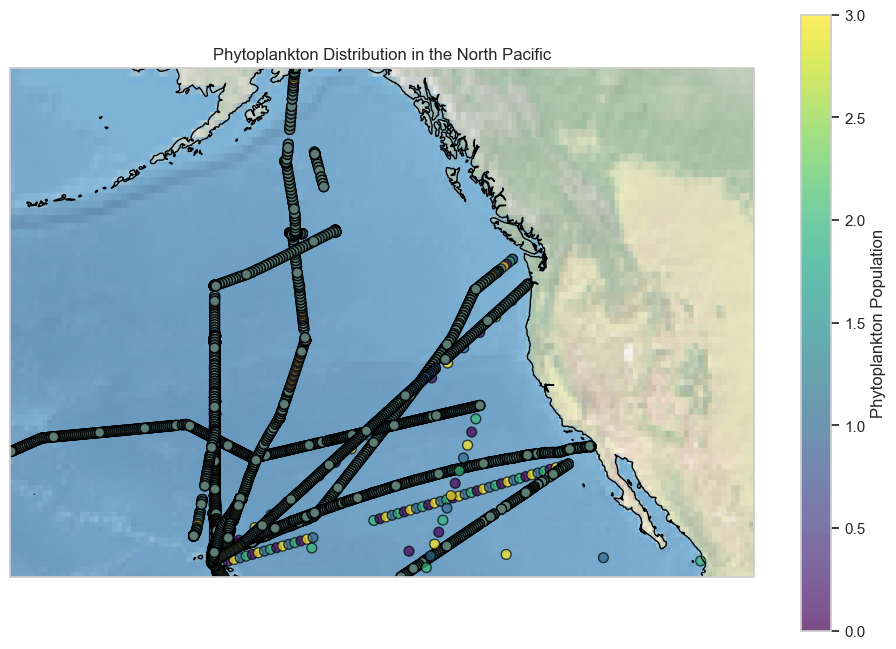

<Figure size 640x480 with 0 Axes>

In [155]:

def plot_phytoplankton_distribution(df):
    # Filter North Pacific data and factorize the 'pop' column
    df = df[(20 < df['lat']) & (df['lat'] < 60) & (-180 < df['lon']) & (df['lon'] < -100)].copy()
    df['pop_numeric'] = pd.factorize(df['pop'])[0]

    # Create map
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.Mercator()})
    ax.set_extent([-180, -100, 20, 60], crs=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()

    # Plot data
    scatter = ax.scatter(df['lon'], df['lat'], c=df['pop_numeric'], cmap='viridis', 
                         s=50, alpha=0.7, edgecolors='black', transform=ccrs.PlateCarree())
    
    plt.colorbar(scatter, ax=ax, label='Phytoplankton Population')
    ax.set_title("Phytoplankton Distribution in the North Pacific")
    plt.show()
    plt.savefig('Phytoplankton Distribution in the North Pacific.png')
plot_phytoplankton_distribution(data)

In [156]:
                                              #VISUALIZATION

In [157]:
#Univariate plot

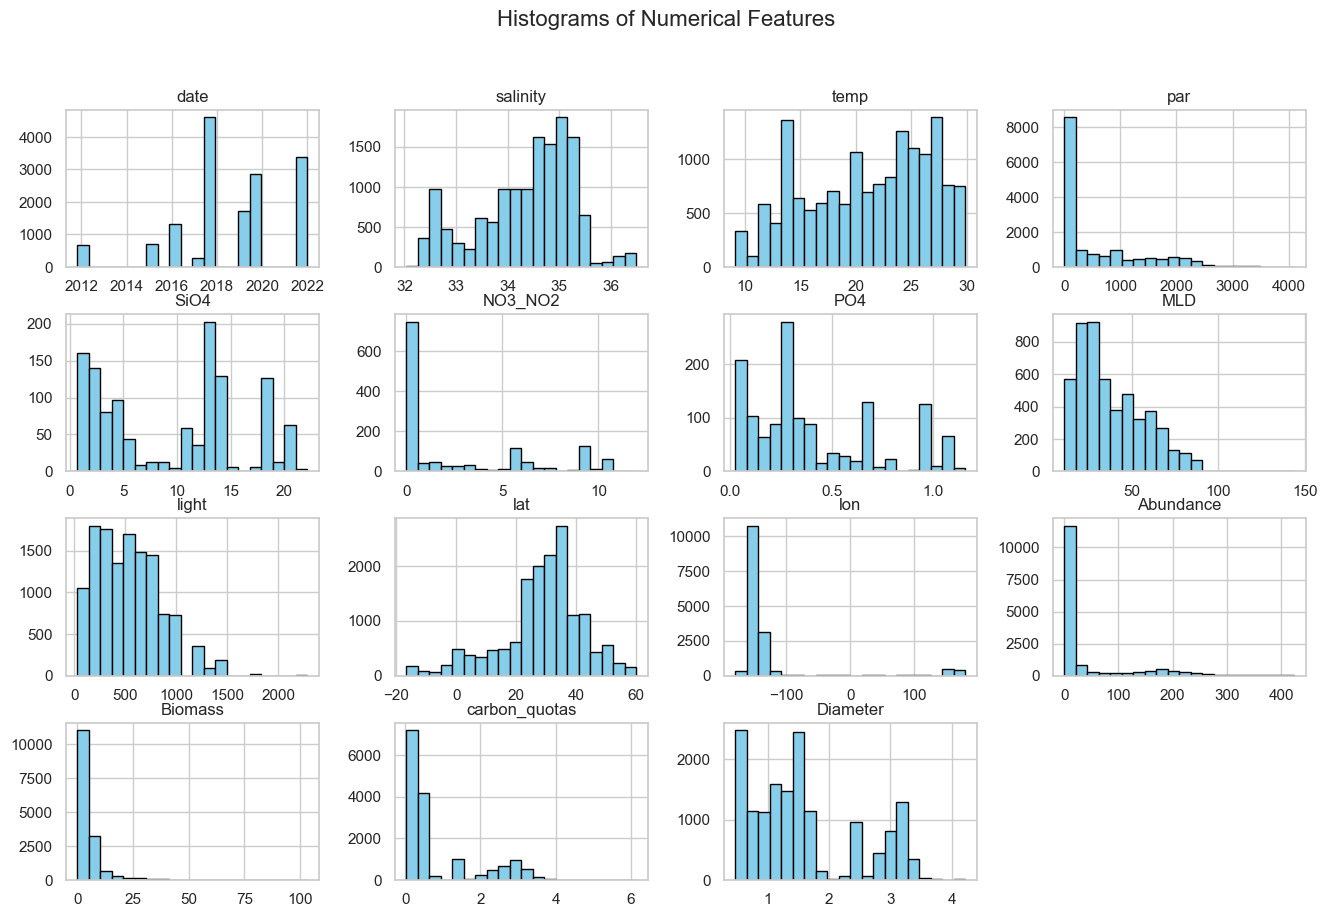

In [49]:
data.hist(figsize=(16, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.savefig('Histograms of Numerical Features.png')
plt.show()

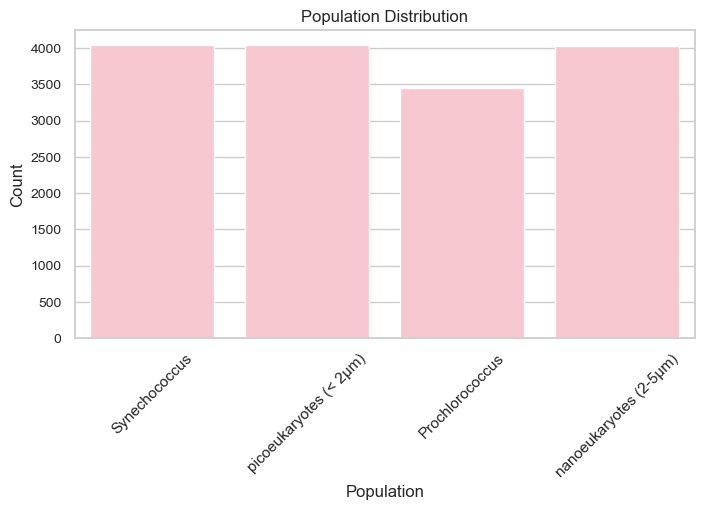

In [50]:
def plot_population_distribution(df):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x='pop',color='pink')
    plt.title("Population Distribution")
    plt.xlabel("Population")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.yticks(fontsize=10)
    plt.savefig('Population Distribution.png')
    plt.show()

plot_population_distribution(data)

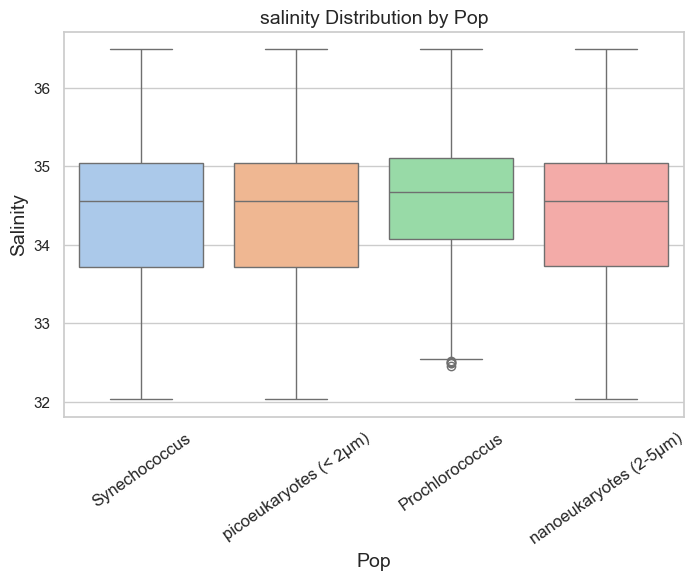

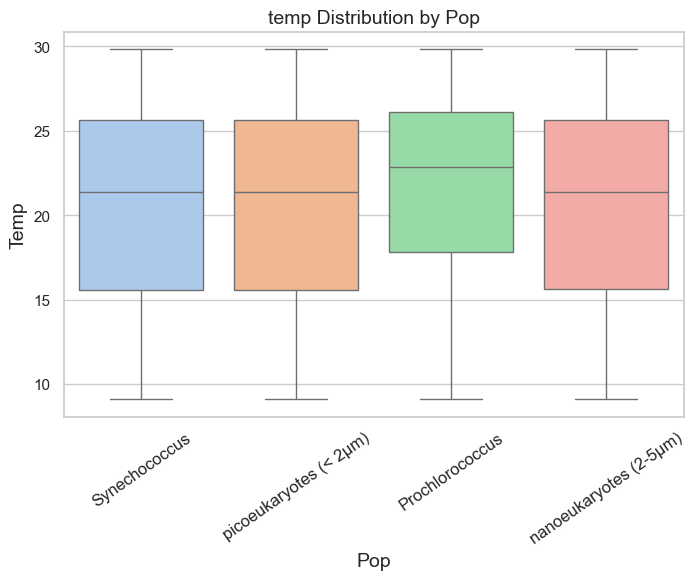

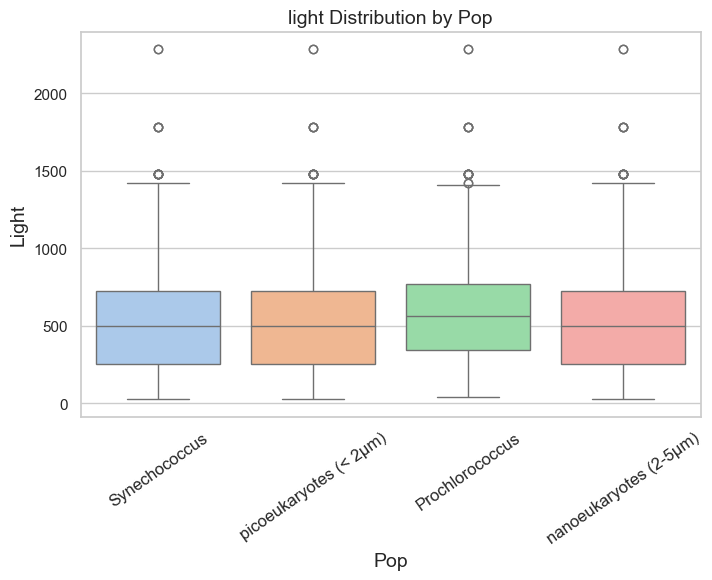

In [51]:

warnings.filterwarnings("ignore")

def plot_boxplots(df, column, hue):
    plt.figure(figsize=(8,5))
    sns.boxplot(data=data, x=hue, y=column, palette="pastel")
    plt.title(f"{column} Distribution by {hue.capitalize()}", fontsize=14)
    plt.xlabel(hue.capitalize(), fontsize=14)
    plt.ylabel(column.capitalize(), fontsize=14)
    plt.xticks(rotation=35, fontsize=12)
    plt.show()
plot_boxplots(data, column='salinity', hue='pop')
plot_boxplots(data, column='temp', hue='pop')
plot_boxplots(data, column='light', hue='pop')

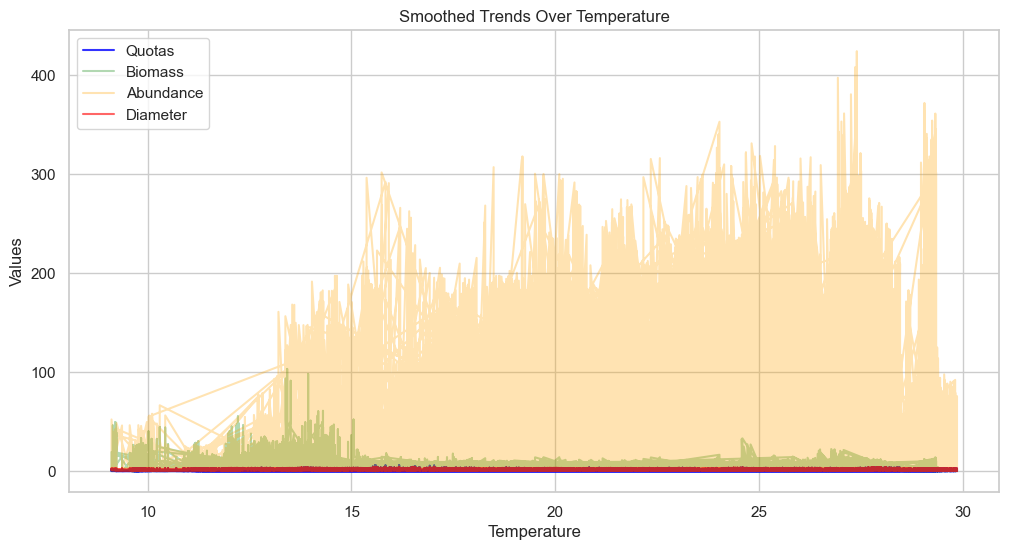

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(data['temp'], data['carbon_quotas'], label='Quotas', color='blue',alpha=0.8)
plt.plot(data['temp'], data['Biomass'], label='Biomass', color='green',alpha=0.3)
plt.plot(data['temp'], data['Abundance'], label='Abundance', color='orange',alpha=0.3)
plt.plot(data['temp'], data['Diameter'], label='Diameter', color='red',alpha=0.6)
plt.title("Smoothed Trends Over Temperature")
plt.xlabel("Temperature")
plt.ylabel("Values")
plt.legend()
plt.savefig('Smoothed Trends Over Temperature.png')
plt.show()

In [53]:
#Bivariate plots

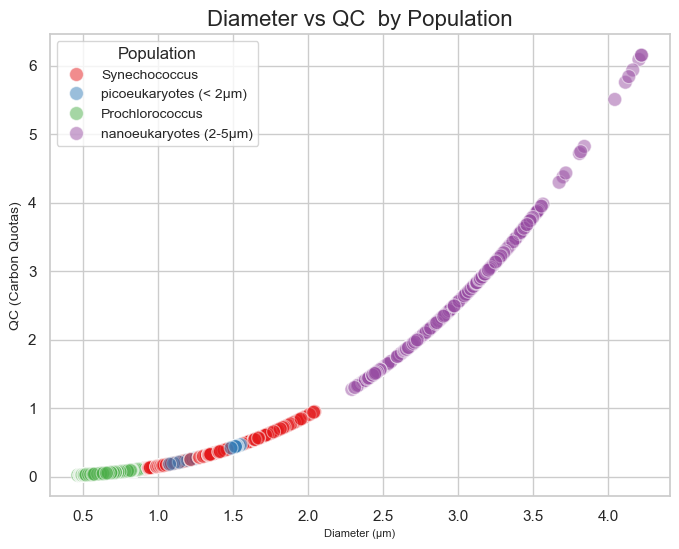

In [54]:
def plot_scatter_diam_qc(df):
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=data, x='Diameter', y='carbon_quotas', hue='pop', palette='Set1', s=100, alpha=0.5)
        plt.title("Diameter vs QC  by Population", fontsize=16)
        plt.xlabel("Diameter (µm)", fontsize=8)
        plt.ylabel("QC (Carbon Quotas)", fontsize=10)
        plt.legend(title="Population", fontsize=10)
        plt.savefig('D vs QC by Pop.png')
        plt.show()
plot_scatter_diam_qc(data)

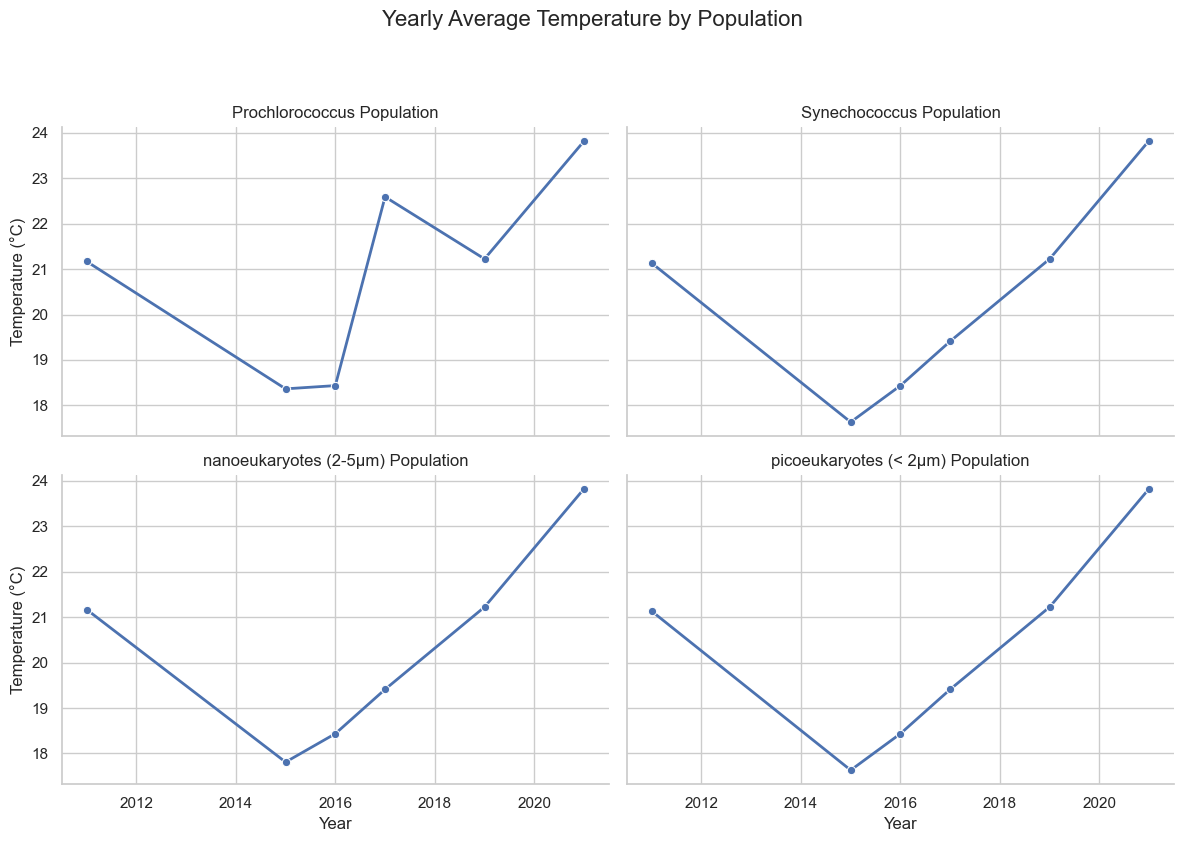

In [55]:
data['Year'] = data['date'].dt.year
#reset_index() converts the grouped result back into a DataFrame for further manipulation.
aggregated_data = data.groupby(['Year', 'pop'])['temp'].mean().reset_index()
# Create a FacetGrid to separate populations
g = sns.FacetGrid(aggregated_data, col='pop', col_wrap=2, sharey=True, height=4, aspect=1.5)
g.map(sns.lineplot, 'Year', 'temp', marker='o', linewidth=2)
g.set_axis_labels("Year", "Temperature (°C)")
g.set_titles("{col_name} Population")
g.fig.suptitle("Yearly Average Temperature by Population", fontsize=16, y=1.05)
plt.tight_layout()
plt.savefig('Yearly Average Temperature By Population.png')
plt.show()

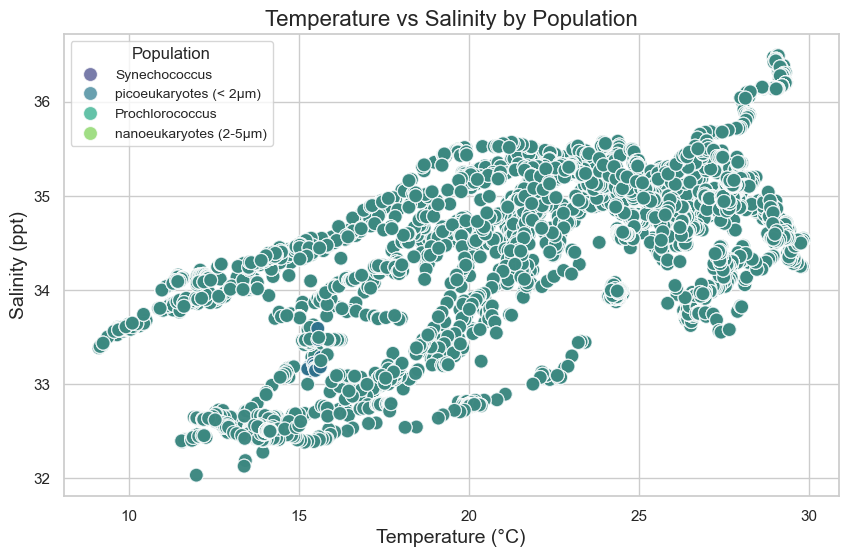

In [56]:
def plot_scatter_temp_salinity(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='temp', y='salinity', hue='pop',palette='viridis', s=100,alpha=0.7)
    plt.title("Temperature vs Salinity by Population", fontsize=16)
    plt.xlabel("Temperature (°C)", fontsize=14)
    plt.ylabel("Salinity (ppt)", fontsize=14)
    plt.legend(title="Population", fontsize=10)
    plt.savefig('Temperature vs Salinity by Population.png')
    plt.show()

plot_scatter_temp_salinity(data)

                                     PREPROCESSING

In [58]:
# HANDLING MISSING VALUES

In [42]:
data.isna().sum()

date                 0
salinity          1429
temp                72
par                288
SiO4             14363
NO3_NO2          14205
PO4              14163
MLD              10434
light             2834
pop                  0
lat                  0
lon                  0
Abundance            0
Biomass              0
carbon_quotas        0
Diameter             0
dtype: int64

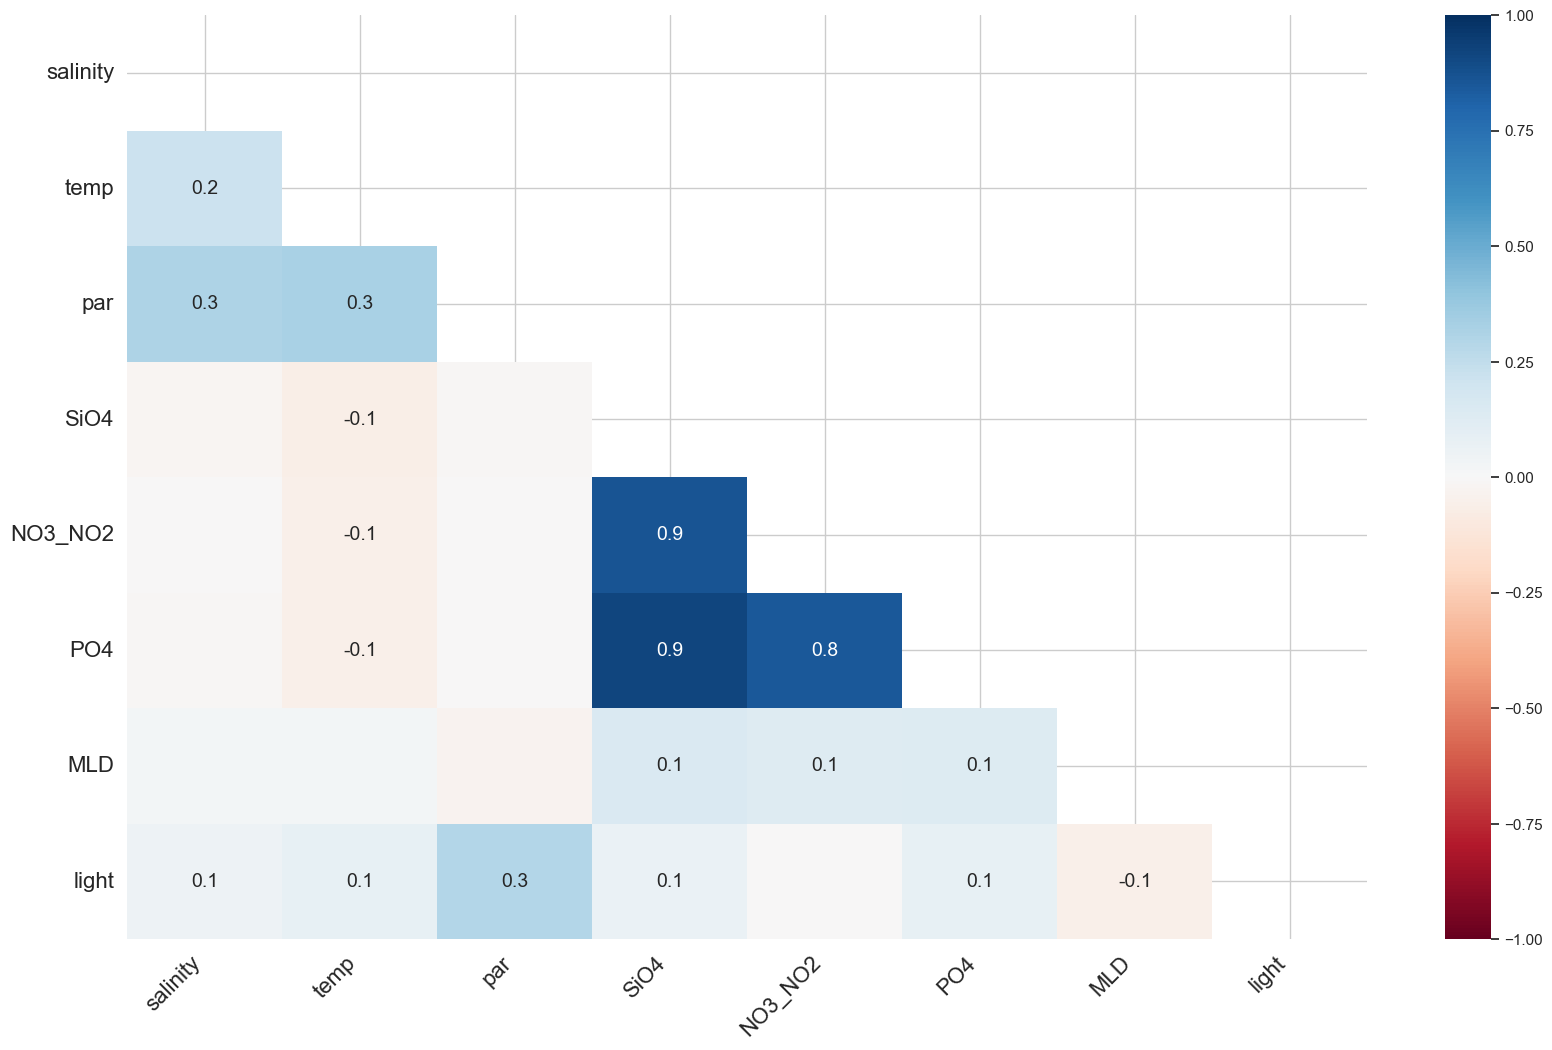

In [60]:
# Visualize the missing data with a heatmap
#Identifies columns where missing data often occurs together
msno.heatmap(data)
plt.show()

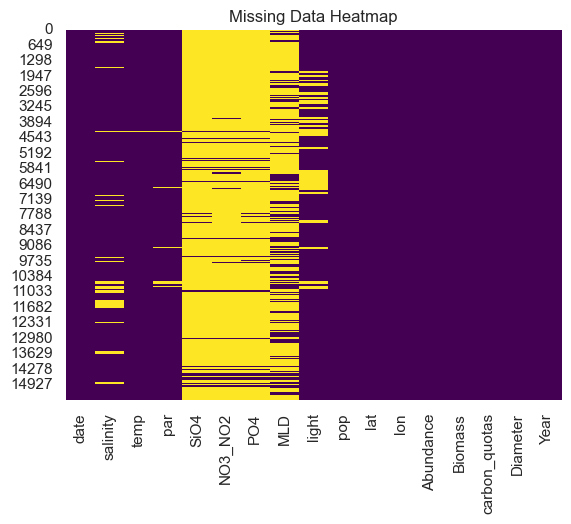

In [61]:
# Plot the missingness heatmap
sns.heatmap(data.isnull(),cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

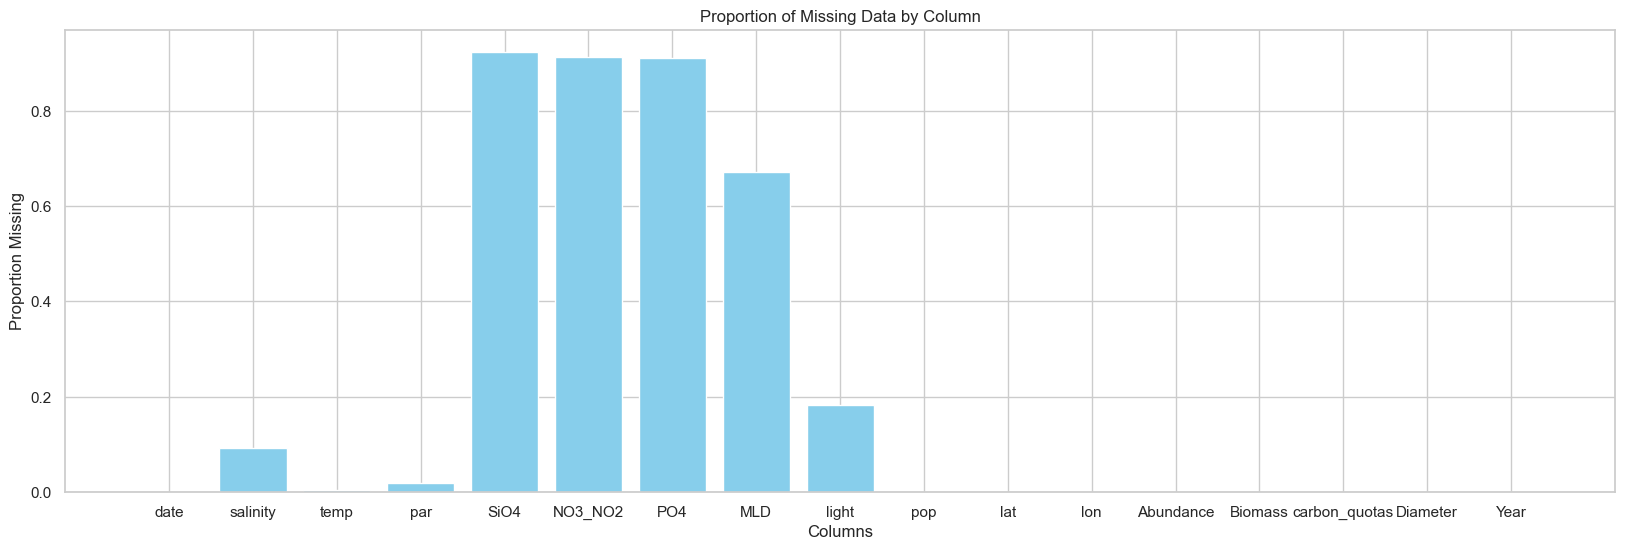

In [62]:
# Calculate the proportion of missing data
plt.figure(figsize=(20,6))
missing_data_proportion = data.isnull().mean()
plt.bar(missing_data_proportion.index, missing_data_proportion.values, color='skyblue')
plt.title('Proportion of Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Proportion Missing')
plt.savefig('Proportion of Missing Data by Column.png')
plt.show()

In [163]:
def check_missingness_type(df):
    # Create a matrix indicating missing values (1 for missing, 0 for present)
    missing_matrix = df.isnull().astype(int)
    # Create a contingency table with counts of missing and present values
    contingency_table = pd.DataFrame({
        "Missing Count": missing_matrix.sum(axis=1),
        "Present Count": df.notnull().sum(axis=1)})   
    # Perform the chi-squared test
    chi2_stats, p_value, _, _ = chi2_contingency(contingency_table)    
    # Interpret the result
    if p_value > 0.05:
        print("The missingness appears to be MCAR (Missing Completely At Random).")
    else:
        print("The missingness does not appear to be MCAR.")
    
    print("\nTo distinguish MAR from MNAR, further domain knowledge or advanced statistical tests are needed.")
check_missingness_type(data)

The missingness appears to be MCAR (Missing Completely At Random).

To distinguish MAR from MNAR, further domain knowledge or advanced statistical tests are needed.


In [67]:
# Imputation
numerical_cols = ['salinity', 'temp', 'par', 'SiO4', 'NO3_NO2', 'PO4', 'MLD', 'light']
data[numerical_cols] = SimpleImputer(strategy='median').fit_transform(data[numerical_cols])

In [68]:
data.isna().sum()

date             0
salinity         0
temp             0
par              0
SiO4             0
NO3_NO2          0
PO4              0
MLD              0
light            0
pop              0
lat              0
lon              0
Abundance        0
Biomass          0
carbon_quotas    0
Diameter         0
Year             0
dtype: int64

In [69]:
# REMOVING DUPLICATES

In [70]:
data.duplicated().sum()

0

In [71]:
# OUTLIER TREATMENT

In [72]:
data=data.drop(columns=['lon','lat','date'])

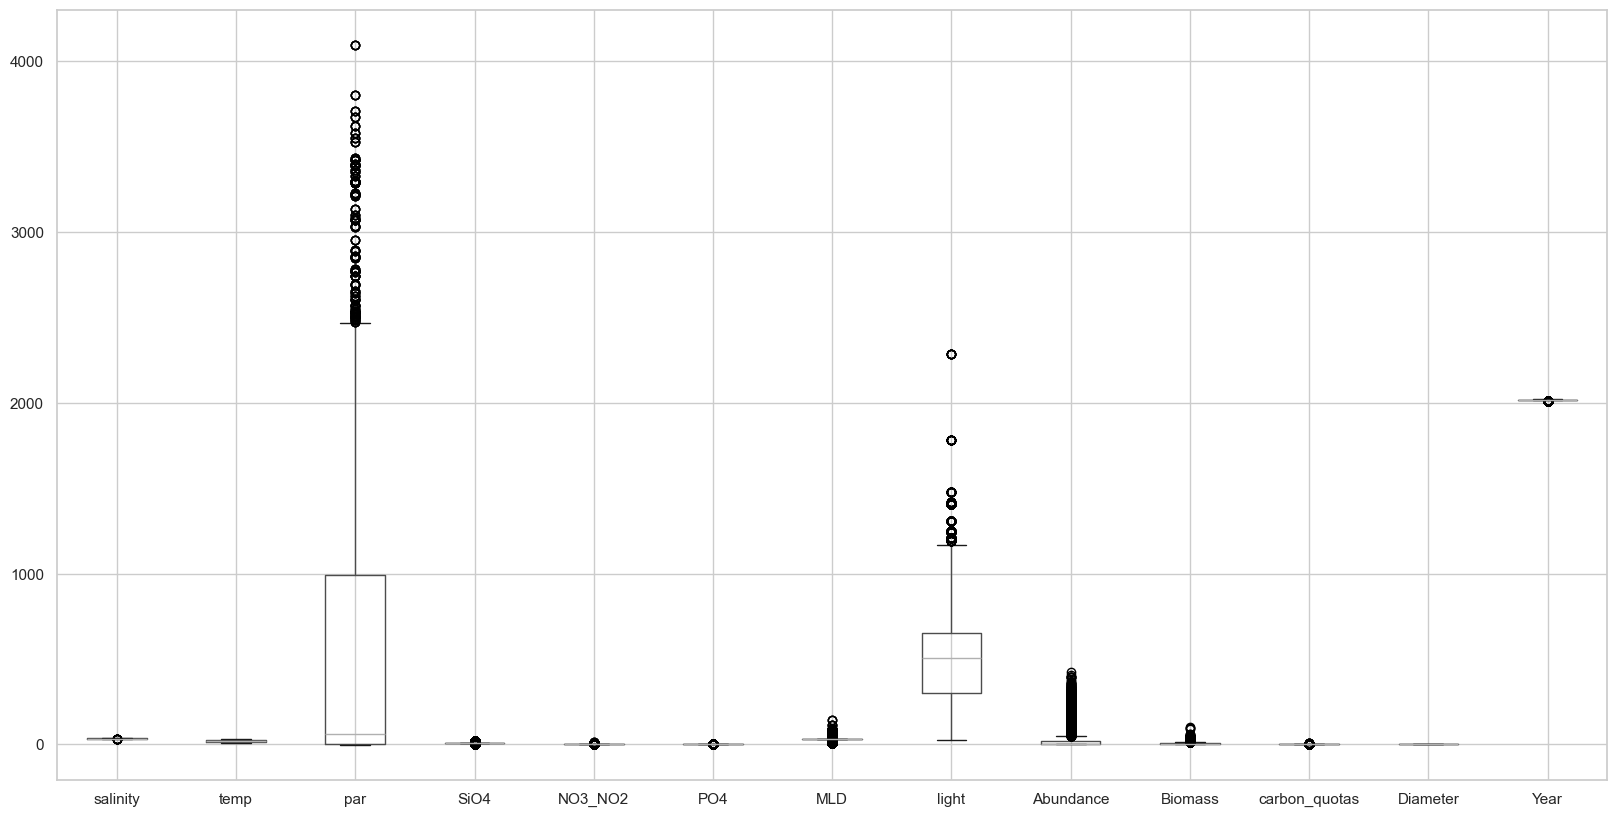

In [73]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.savefig('Outlier Detection.png')
plt.show()

In [74]:
#CAPPING
def cap_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)  
        Q3 = data[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower = Q1 - 1.5* IQR
        upper = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower, upper)
    return data

columns_to_cap = ['par', 'MLD', 'light','Abundance','Biomass']  
data = cap_outliers(data, columns_to_cap)

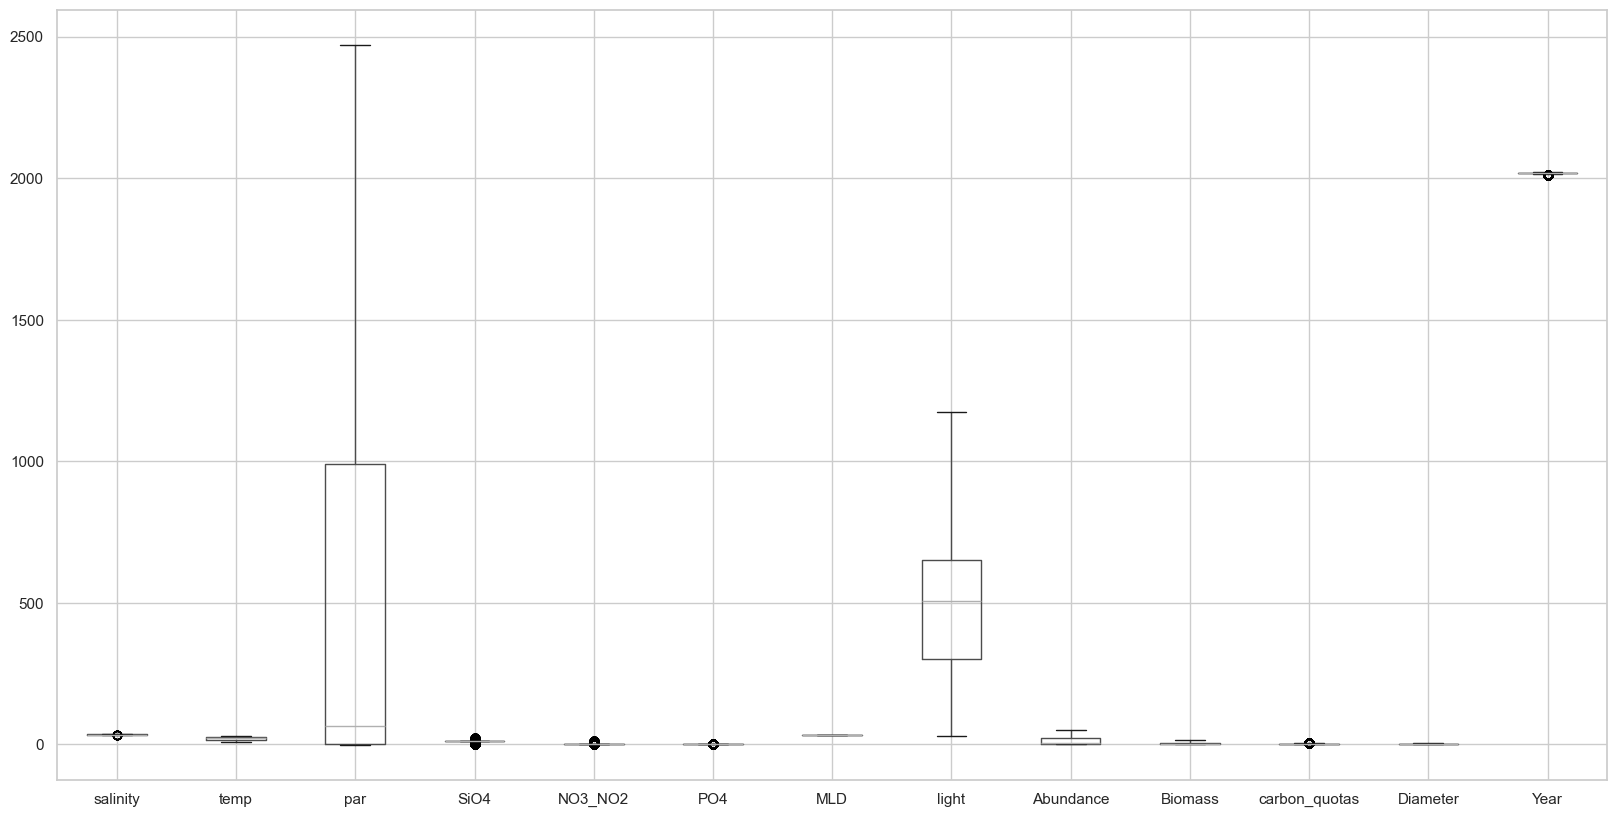

In [75]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

In [76]:
# ENCODING

In [44]:
data['pop']= LabelEncoder().fit_transform(data['pop'])

In [46]:
# FEATURE ENGINEERING

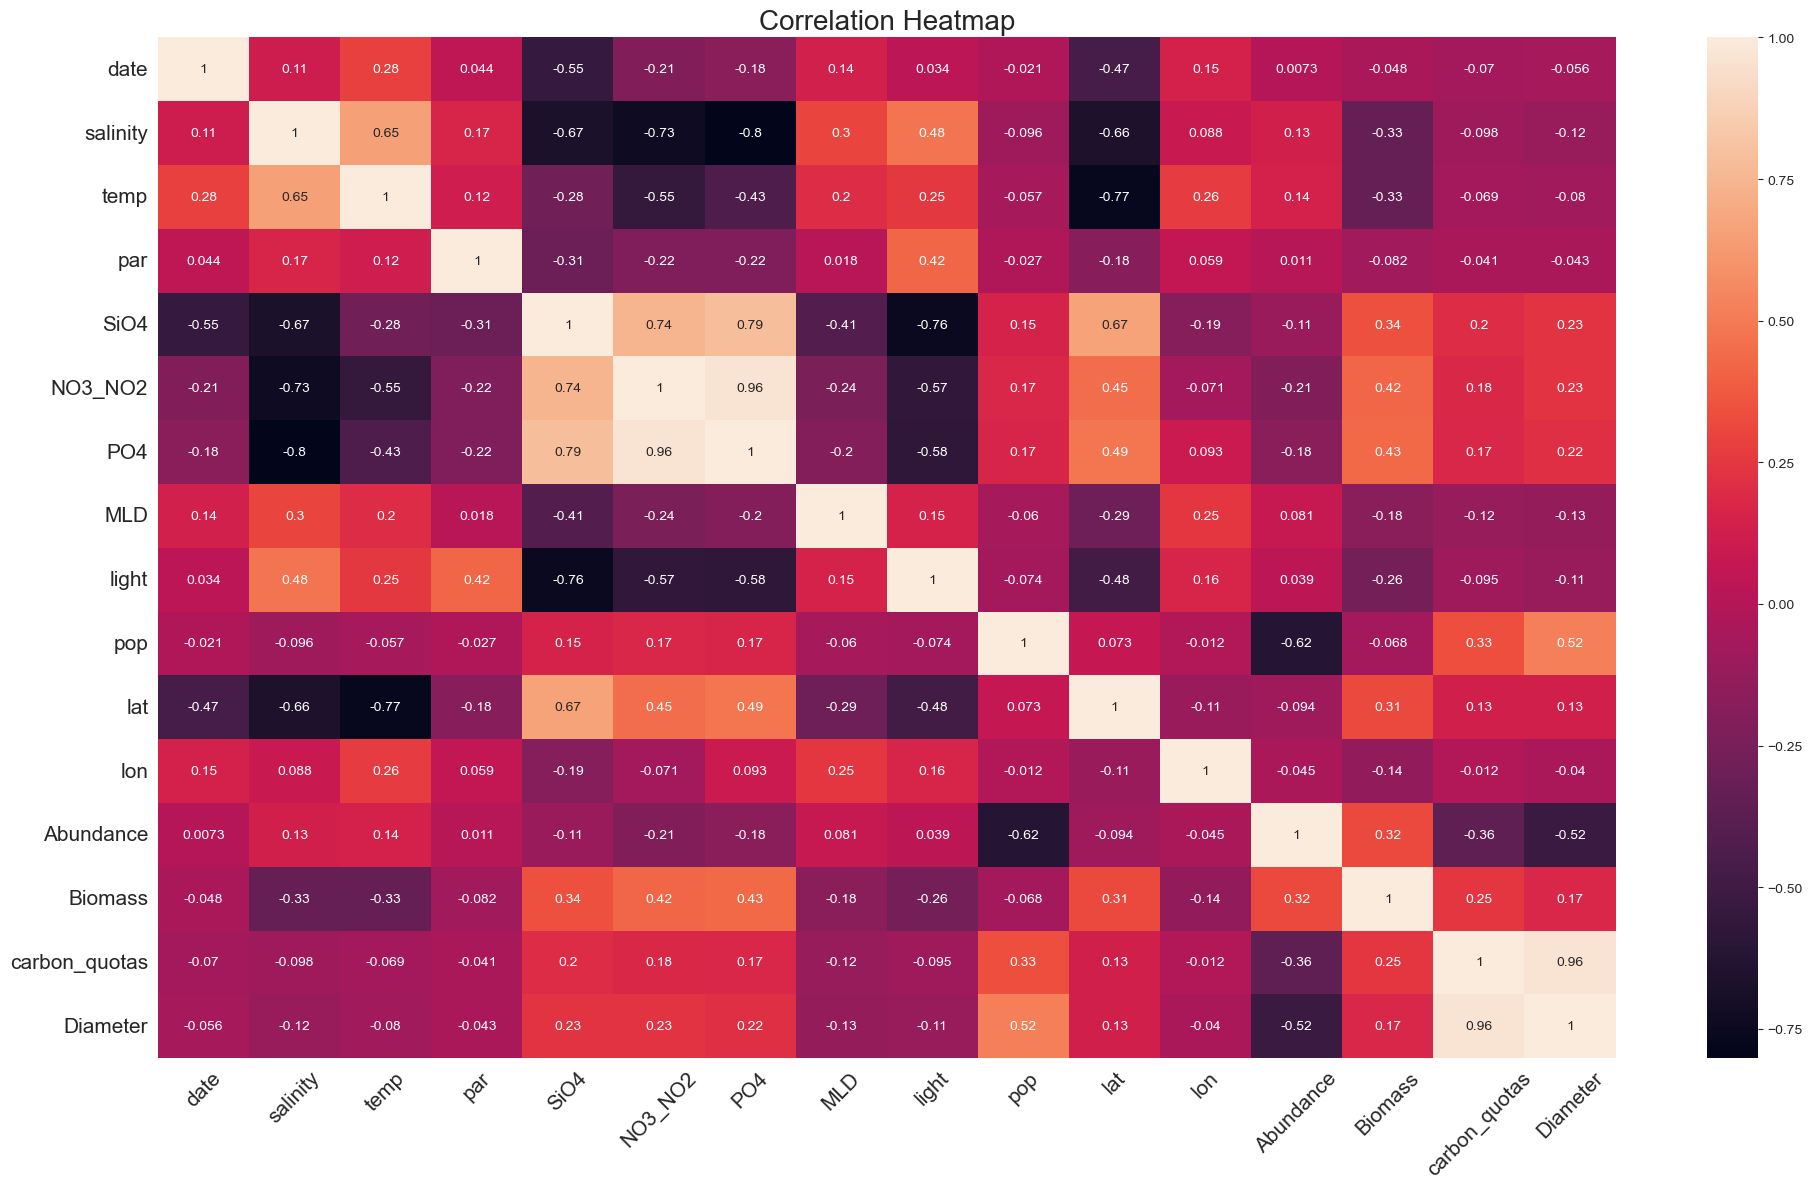

In [48]:
#Correlation Heatmap
sns.set_style("white")
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [84]:
x = data.drop('pop', axis=1)
y = data[['pop']]

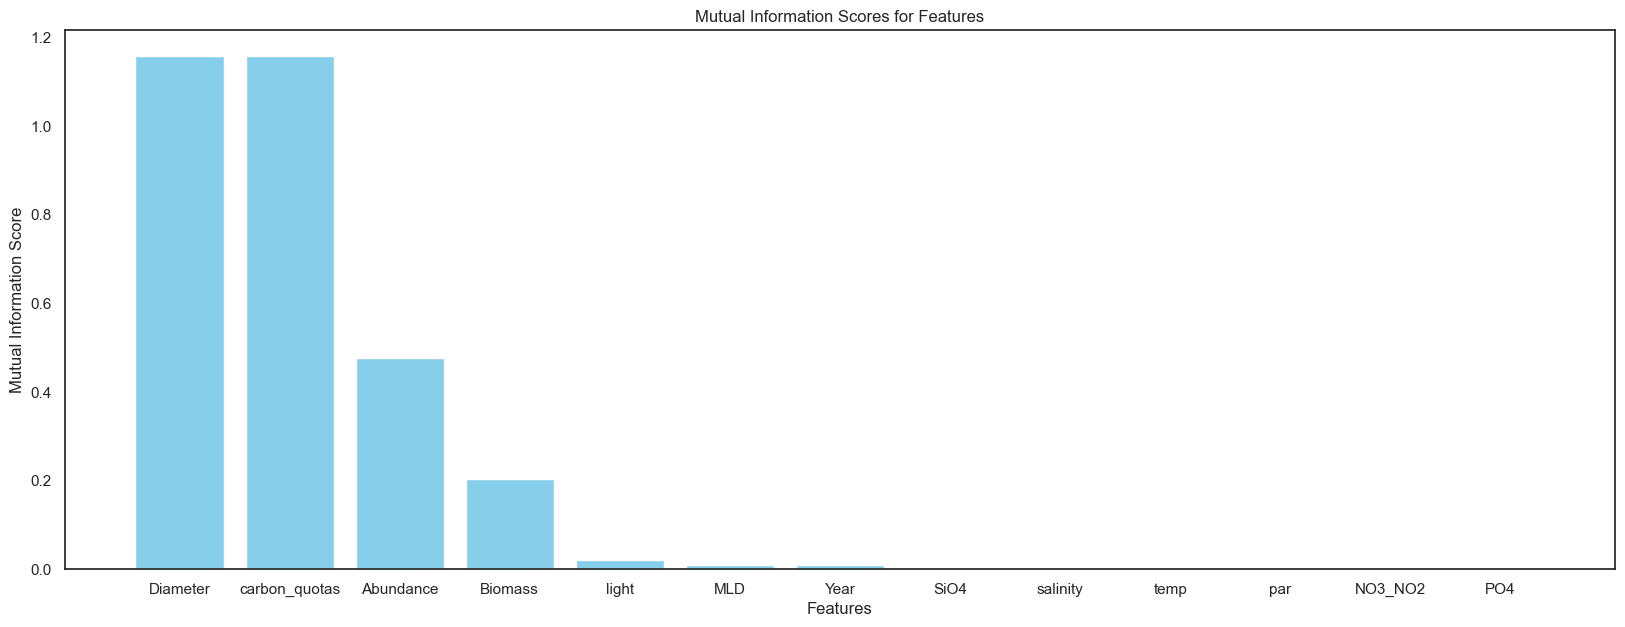

In [85]:
# Calculate mutual information
mi_scores = mutual_info_classif(x, y, random_state=42)
mi_df = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(20,7))
plt.bar(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.savefig('Mutual Information Scores for Features.png')
plt.show()

In [87]:
x=x.drop(['SiO4','NO3_NO2','PO4','Year'],axis=1)

In [88]:
x.head(1)

,salinity,temp,par,MLD,light,Abundance,Biomass,carbon_quotas,Diameter
0,34.5783,14.742111,1020.094444,31.318625,991.952516,0.532951,0.048282,0.090593,0.82328


In [89]:
#SCALING

In [90]:
x = StandardScaler().fit_transform(x)

                               TRAIN-TEST-SPLIT

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

                                             CLASS BALANCING

In [96]:
# minority class with SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

<Figure size 800x400 with 0 Axes>

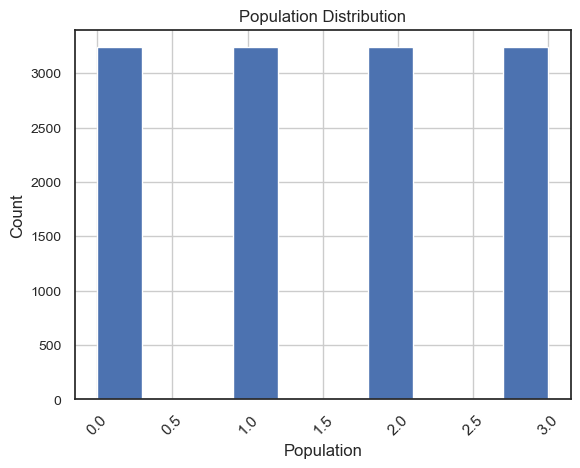

In [97]:
plt.figure(figsize=(8,4))
y_train.hist()
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

                    MODEL BUILDING & HYPERPARAMETER TUNING

In [101]:
def evaluate_models_with_metrics(models_params, x_train, y_train, x_test, y_test, scoring='accuracy', cv=5):
    results = []
    for model_name, (model, param_grid) in models_params.items():
        print(f"Running GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)
        grid_search.fit(x_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Train and test accuracies
        train_accuracy = accuracy_score(y_train, best_model.predict(x_train))
        test_accuracy = accuracy_score(y_test, best_model.predict(x_test))

        mean_cv_score = grid_search.best_score_
        
        print(f"{model_name}: Best Score = {mean_cv_score}, Best Params = {best_params}")

        results.append({
            'Model': model_name,
            'Best Parameters': best_params,
            'Train Accuracy': train_accuracy,
            'Mean CV Score': mean_cv_score,
            'Test Accuracy': test_accuracy
        })

    return pd.DataFrame(results)


In [102]:
def evaluate_logistic_regression(x_train, y_train, x_test, y_test, scoring='accuracy', cv=5):
    models_params = {
        'Logistic Regression (L2)': (
            LogisticRegression(),
            {
                'C': [0.01, 0.1, 1, 10],
                'penalty': ['l2'],
                'solver': ['lbfgs', 'liblinear'],
                'max_iter': [100, 200]
            }
        ),
        'Logistic Regression (L1 - Lasso)': (
            LogisticRegression(),
            {
                'C': [0.01, 0.1, 1, 10],
                'penalty': ['l1'],
                'solver': ['liblinear', 'saga'],
                'max_iter': [100, 200]
            }
        )
    }
    return evaluate_models_with_metrics(models_params, x_train, y_train, x_test, y_test, scoring, cv)


In [103]:
def evaluate_decision_tree_and_random_forest(x_train, y_train, x_test, y_test, scoring='accuracy', cv=5):
    models_params = {
        'Random Forest': (
            RandomForestClassifier(),
            {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'max_features': ['sqrt', 'log2']
            }
        ),
        'Decision Tree': (
            DecisionTreeClassifier(),
            {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best'],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        )
    }
    return evaluate_models_with_metrics(models_params, x_train, y_train, x_test, y_test, scoring, cv)

In [104]:
def evaluate_svc_and_knn(x_train, y_train, x_test, y_test, scoring='accuracy', cv=5):
    models_params = {
        'SVM': (
            SVC(),
            {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
        ),
        'KNN': (
            KNeighborsClassifier(),
            {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            }
        )
    }
    return evaluate_models_with_metrics(models_params, x_train, y_train, x_test, y_test, scoring, cv)

In [105]:
def evaluate_naive_bayes_and_xgboost(x_train, y_train, x_test, y_test, scoring='accuracy', cv=5):
    models_params = {
        'Naive Bayes': (
            GaussianNB(),
            {
                'var_smoothing': [1e-9, 1e-8, 1e-7]
            }
        ),
        'XGBoost': (
            XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]
            }
        )
    }
    return evaluate_models_with_metrics(models_params, x_train, y_train, x_test, y_test, scoring, cv)

In [106]:
# Example usage for each group:
decision_tree_rf_results = evaluate_decision_tree_and_random_forest(x_train, y_train, x_test, y_test)
decision_tree_rf_results

Running GridSearchCV for Random Forest...
Random Forest: Best Score = 0.9891942848225815, Best Params = {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Running GridSearchCV for Decision Tree...
Decision Tree: Best Score = 0.9804723496814709, Best Params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


,Model,Best Parameters,Train Accuracy,Mean CV Score,Test Accuracy
0,Random Forest,"{'max_depth': 20, 'max_features': 'log2', 'min...",1.0,0.989194,0.989078
1,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.0,0.980472,0.981047


In [107]:
svc_knn_results = evaluate_svc_and_knn(x_train, y_train, x_test, y_test)
svc_knn_results

Running GridSearchCV for SVM...
SVM: Best Score = 0.9691262132452794, Best Params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Running GridSearchCV for KNN...
KNN: Best Score = 0.9851804203534552, Best Params = {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


,Model,Best Parameters,Train Accuracy,Mean CV Score,Test Accuracy
0,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.973989,0.969126,0.962416
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",1.000000,0.985180,0.982653


In [108]:
naive_bayes_xgb_results = evaluate_naive_bayes_and_xgboost(x_train, y_train, x_test, y_test)
naive_bayes_xgb_results

Running GridSearchCV for Naive Bayes...
Naive Bayes: Best Score = 0.8758884028760525, Best Params = {'var_smoothing': 1e-09}
Running GridSearchCV for XGBoost...
XGBoost: Best Score = 0.991123803431632, Best Params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


,Model,Best Parameters,Train Accuracy,Mean CV Score,Test Accuracy
0,Naive Bayes,{'var_smoothing': 1e-09},0.876042,0.875888,0.873113
1,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",1.000000,0.991124,0.991327


In [110]:
logistic_regression_results = evaluate_logistic_regression(x_train, y_train, x_test, y_test)
logistic_regression_results

Running GridSearchCV for Logistic Regression (L2)...
Logistic Regression (L2): Best Score = 0.9093089028498458, Best Params = {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Running GridSearchCV for Logistic Regression (L1 - Lasso)...
Logistic Regression (L1 - Lasso): Best Score = 0.9126277272705614, Best Params = {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


,Model,Best Parameters,Train Accuracy,Mean CV Score,Test Accuracy
0,Logistic Regression (L2),"{'C': 10, 'max_iter': 100, 'penalty': 'l2', 's...",0.908537,0.909309,0.904272
1,Logistic Regression (L1 - Lasso),"{'C': 10, 'max_iter': 200, 'penalty': 'l1', 's...",0.913090,0.912628,0.909091


                             MODEL EVALUATION  

In [112]:
# Concatenate all results after running them
final_results = pd.concat([decision_tree_rf_results, svc_knn_results, naive_bayes_xgb_results, logistic_regression_results])
final_results = final_results.sort_values(by='Test Accuracy', ascending=False)
final_results.reset_index(drop=True, inplace=True)
final_results

,Model,Best Parameters,Train Accuracy,Mean CV Score,Test Accuracy
0,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",1.000000,0.991124,0.991327
1,Random Forest,"{'max_depth': 20, 'max_features': 'log2', 'min...",1.000000,0.989194,0.989078
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",1.000000,0.985180,0.982653
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.000000,0.980472,0.981047
4,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.973989,0.969126,0.962416
5,Logistic Regression (L1 - Lasso),"{'C': 10, 'max_iter': 200, 'penalty': 'l1', 's...",0.913090,0.912628,0.909091
6,Logistic Regression (L2),"{'C': 10, 'max_iter': 100, 'penalty': 'l2', 's...",0.908537,0.909309,0.904272
7,Naive Bayes,{'var_smoothing': 1e-09},0.876042,0.875888,0.873113


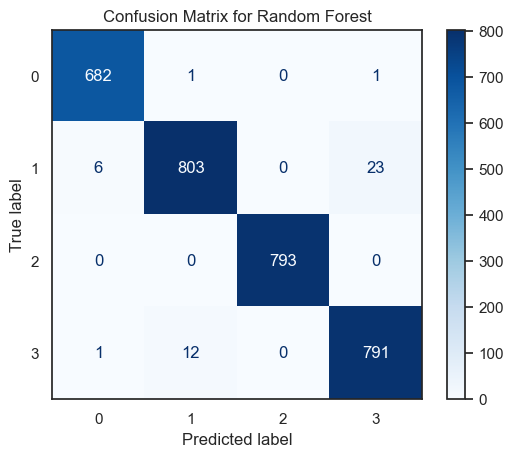

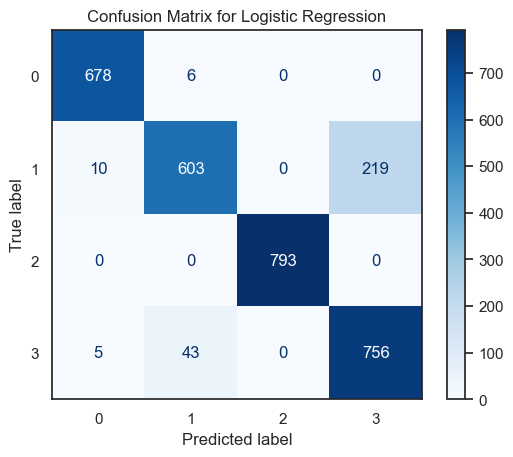

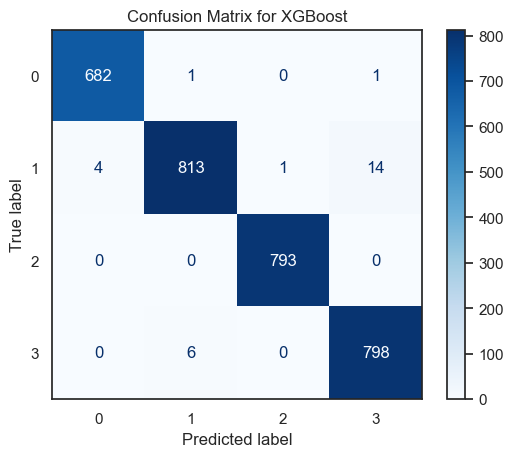

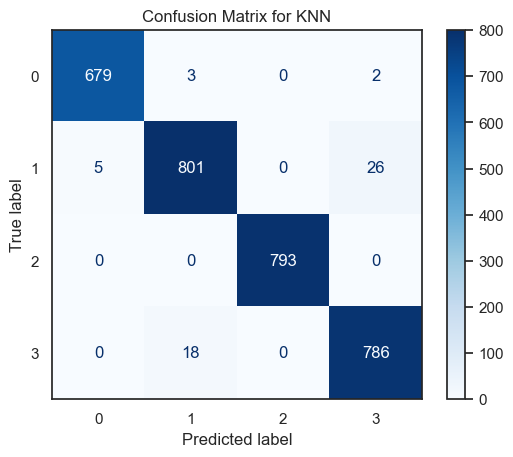

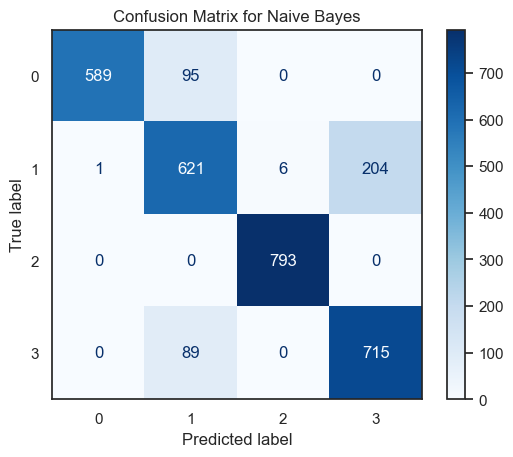

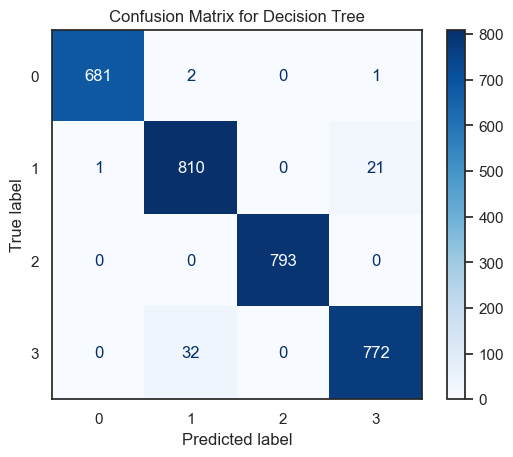

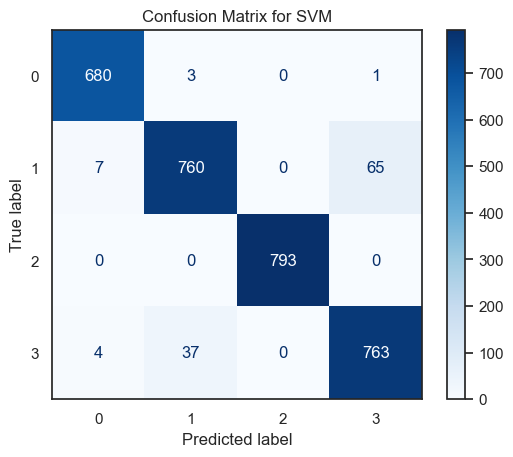

,Model,Precision,Recall,F1-Score
0,Random Forest,0.985904,0.985866,0.985846
1,Logistic Regression,0.917146,0.909091,0.907819
2,XGBoost,0.991351,0.991327,0.991317
3,KNN,0.982682,0.982653,0.982649
4,Naive Bayes,0.879294,0.873113,0.874073
5,Decision Tree,0.981755,0.981690,0.981699
6,SVM,0.962577,0.962416,0.962338


In [114]:
# Function to evaluate models
def evaluate_models(models, x_train, y_train, x_test, y_test):
    results = []
    num_classes = len(np.unique(y_test))  # Count unique classes in y_test

    for model_name in models:
        model = models[model_name]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        report = classification_report(y_test, y_pred, output_dict=True)

        results.append({
            "Model": model_name,
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"],
        })

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix for {model_name}")
        plt.grid(False)
        plt.savefig('CM.png')
        plt.show()

    # Return results as a DataFrame
    return pd.DataFrame(results)

# Updated model definitions
models = {
    "Random Forest": RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100),
    "Logistic Regression": LogisticRegression(C=10, max_iter=200, penalty='l1', solver='saga'),
    "XGBoost": XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    "Naive Bayes": GaussianNB(var_smoothing=1e-09),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter='best'),
    "SVM": SVC(C=10, gamma='scale', kernel='rbf', probability=True)
}

results = evaluate_models(models, x_train, y_train, x_test, y_test)
results

In [115]:
results =results.sort_values(by='F1-Score', ascending=False)
results.reset_index(drop=True, inplace=True)
results

,Model,Precision,Recall,F1-Score
0,XGBoost,0.991351,0.991327,0.991317
1,Random Forest,0.985904,0.985866,0.985846
2,KNN,0.982682,0.982653,0.982649
3,Decision Tree,0.981755,0.981690,0.981699
4,SVM,0.962577,0.962416,0.962338
5,Logistic Regression,0.917146,0.909091,0.907819
6,Naive Bayes,0.879294,0.873113,0.874073


                         MODEL SAVING

In [120]:
model =XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0)
model.fit(x_train, y_train)

# Save the model to a file
with open('xgb_model.pkl1', 'wb') as f:
    pickle.dump(model, f)